# Generating Images using Azure OpenAI

Pre-requisites:
1. Create Azure OpenAI Resource
2. Deploy DALL-E model

## Install Library

In [ ]:
%pip install openai
%pip install requests
%pip install pillow

## Load Azure Configuration

In [1]:
import os

azure_openai_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
azure_openai_key = os.getenv("AZURE_OPENAI_API_KEY")
azure_openai_deployment = os.getenv("AZURE_OPENAI_CHAT_DEPLOYMENT_NAME")
azure_openai_api_version = os.getenv("AZURE_OPENAI_API_VERSION")

## Create a Client

In [4]:
from openai import AsyncAzureOpenAI

# AzureOpenAI is the standard client for interacting with Azure's OpenAI Service, but it does not support asynchronous operations
# AsyncAzureOpenAI is designed to support asynchronous operations, allowing your code to perform other tasks while waiting for the API response
dalle_client = AsyncAzureOpenAI(
    api_key=azure_openai_key, 
    api_version=azure_openai_api_version,
    azure_endpoint=azure_openai_endpoint
)

deployment_name = "dall-e-3"


## Create a Request

In [5]:
user_prompt = "a cat walking down a street in the morning at a suburban neighborhood"

# https://github.com/openai/openai-python/blob/main/src/openai/resources/images.py
result = await dalle_client.images.generate(
    model=deployment_name, # the name of your DALL-E 3 deployment
    prompt=user_prompt,
    size="1024x1024", 
    style="natural",
    quality="standard",
    n=1
)

# Retrieve the image URL from the response (assuming response structure)
image_url = result.data[0].url

## Show the Image

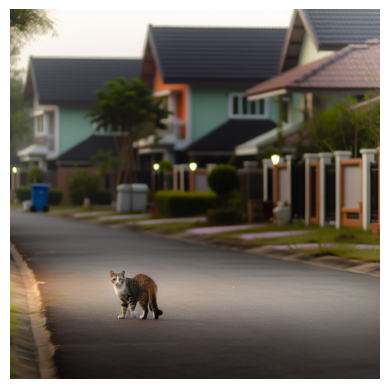

In [6]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Open the image from the URL
im = Image.open(requests.get(image_url, stream=True).raw)

# Save the image to a file
im.save("images/generated_image.jpg")

# Display the image with matplotlib
plt.imshow(im)
plt.axis("off")  # Turn off axis labels
plt.show()